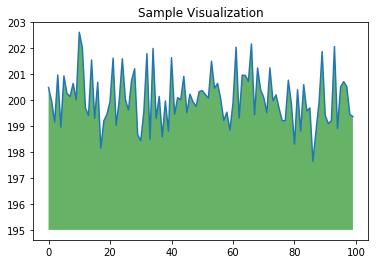

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/birds.zip'


unzip:  cannot find or open /content/drive/MyDrive/birds.zip, /content/drive/MyDrive/birds.zip.zip or /content/drive/MyDrive/birds.zip.ZIP.


In [ ]:
!unzip '/content/drive/MyDrive/birds.zip'


Archive:  /content/drive/MyDrive/birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 150 images belonging to 1 classes.
Found 157 images belonging to 1 classes.


In [ ]:
train.class_indices


{'train_data': 0}

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 139s 8s/step - loss: 156.4031 - accuracy: 0.0000e+00 - val_loss: 386.7168 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 104s 6s/step - loss: 761.1440 - accuracy: 0.0000e+00 - val_loss: 1322.6021 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 105s 6s/step - loss: 1965.2390 - accuracy: 0.0000e+00 - val_loss: 2783.5166 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 126s 7s/step - loss: 2865.3005 - accuracy: 0.0000e+00 - val_loss: 2300.4976 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 127s 7s/step - loss: 945.6373 - accuracy: 0.0533 - val_loss: 477.6033 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 108s 6s/step - loss: 327.0351 - accuracy: 0.3000 - val_loss: 299.7666 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 105s 6s/step - loss: 510.9922 - accur

In [ ]:
model.save('birdSpecies.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/test_data/test_data/blasti/DSC_6396.jpg',target_size=(120,120))

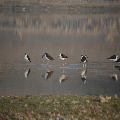

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img

array([[[107.,  94.,  85.],
        [102.,  92.,  83.],
        [108.,  95.,  86.],
        ...,
        [ 73.,  69.,  58.],
        [ 71.,  67.,  64.],
        [109.,  91.,  71.]],

       [[101.,  91.,  79.],
        [ 99.,  94.,  88.],
        [105.,  94.,  88.],
        ...,
        [ 91.,  86.,  80.],
        [ 97.,  88.,  81.],
        [ 97.,  92.,  88.]],

       [[106.,  93.,  84.],
        [ 96.,  87.,  80.],
        [103.,  95.,  82.],
        ...,
        [ 95.,  84.,  78.],
        [ 86.,  83.,  78.],
        [ 93.,  84.,  77.]],

       ...,

       [[ 78.,  59.,  44.],
        [ 68.,  52.,  39.],
        [ 51.,  46.,  43.],
        ...,
        [ 90.,  78.,  62.],
        [ 75.,  71.,  46.],
        [ 69.,  62.,  46.]],

       [[ 87.,  65.,  52.],
        [ 76.,  59.,  41.],
        [ 45.,  45.,  37.],
        ...,
        [ 76.,  68.,  49.],
        [ 85.,  81.,  56.],
        [ 77.,  70.,  52.]],

       [[ 67.,  56.,  38.],
        [ 62.,  56.,  42.],
        [ 48.,  

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[107.,  94.,  85.],
         [102.,  92.,  83.],
         [108.,  95.,  86.],
         ...,
         [ 73.,  69.,  58.],
         [ 71.,  67.,  64.],
         [109.,  91.,  71.]],

        [[101.,  91.,  79.],
         [ 99.,  94.,  88.],
         [105.,  94.,  88.],
         ...,
         [ 91.,  86.,  80.],
         [ 97.,  88.,  81.],
         [ 97.,  92.,  88.]],

        [[106.,  93.,  84.],
         [ 96.,  87.,  80.],
         [103.,  95.,  82.],
         ...,
         [ 95.,  84.,  78.],
         [ 86.,  83.,  78.],
         [ 93.,  84.,  77.]],

        ...,

        [[ 78.,  59.,  44.],
         [ 68.,  52.,  39.],
         [ 51.,  46.,  43.],
         ...,
         [ 90.,  78.,  62.],
         [ 75.,  71.,  46.],
         [ 69.,  62.,  46.]],

        [[ 87.,  65.,  52.],
         [ 76.,  59.,  41.],
         [ 45.,  45.,  37.],
         ...,
         [ 76.,  68.,  49.],
         [ 85.,  81.,  56.],
         [ 77.,  70.,  52.]],

        [[ 67.,  56.,  38.],
       

In [ ]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 179ms/step


1